<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/deeplearningstudy/blob/main/ch04_%EC%B5%9C%EC%86%8C%EC%A0%9C%EA%B3%B1%EB%B2%95%EA%B3%BC%ED%8F%89%EA%B7%A0%EC%A0%9C%EA%B3%B1%EC%98%A4%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4장. 가장 훌륭한 예측선

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 4. 파이썬 코딩으로 확인하는 최소 제곱

### 1. 환경 준비

In [ ]:
import numpy as np

### 2. 데이터 준비

In [ ]:
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

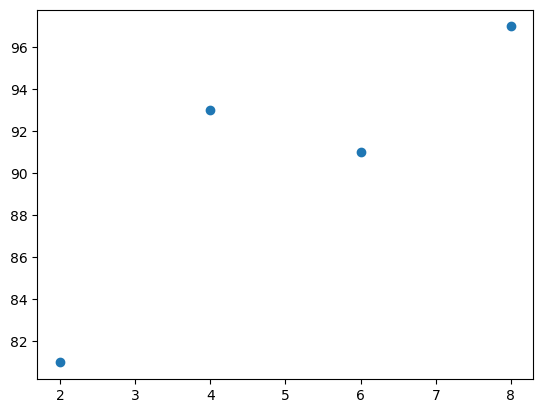

In [ ]:
# [허] 교재 69p 시각화. 5장에서 다시 나옴
import matplotlib.pyplot as plt

# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.show()

#### [x와 y의 평균값]

In [ ]:
#x의 평균값을 구합니다.
mx = np.mean(x)

#y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


#### [기울기 공식의 분모와 분자]

* [허] 교재 68p

$$
a = \frac{\sum (x - \bar{x})(y - \bar{y})}{\sum (x - \bar{x})^2}
$$

$$
b = \bar{y} - (\bar{x} \times 기울기 a)
$$

In [ ]:
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


### 3. 기울기와 y 절편 구하기

In [ ]:
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y 절편 b를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


In [ ]:
# [허] 교재 69페이지 예측값 생성

pred = a*x + b
pred

array([83.6, 88.2, 92.8, 97.4])

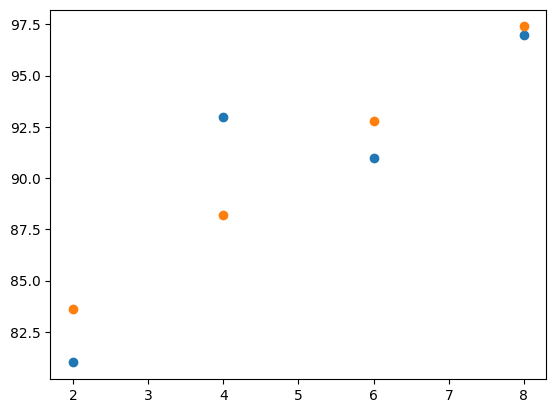

In [ ]:
# [허] 예측값 시각화
plt.scatter(x, y)
plt.scatter(x, pred)
plt.show()

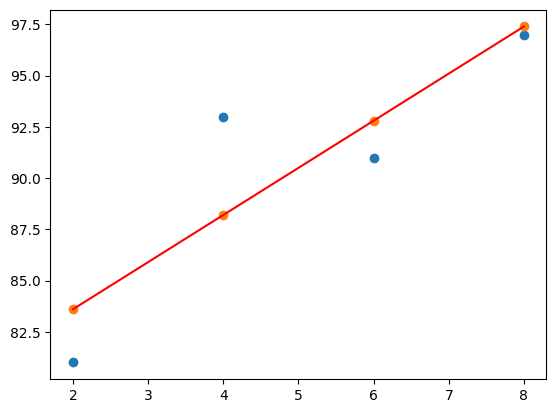

In [ ]:
# [허] 예측선 시각화
plt.scatter(x, y)
plt.scatter(x, pred)
plt.plot(x, pred,'r')
plt.show()

## 6. 파이썬 코딩으로 확인하는 평균 제곱 오차

### 1. 환경 준비

In [ ]:
import numpy as np

### 2. 데이터 준비

In [ ]:
# 가상의 기울기 a와 y 절편 b를 정합니다.
fake_a=3
fake_b=76

# 공부 시간 x와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

### 3. 평균 제곱 오차 구하기

In [ ]:
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x):
    return fake_a * x + fake_b

# 예측 값이 들어갈 빈 리스트를 만듭니다.
predict_result = []

# 모든 x 값을 한 번씩 대입하여 predict_result 리스트를 완성합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [ ]:
# [허] 코드 간소화
pred_lsa = fake_a*x + fake_b
pred_lsa

array([ 82,  88,  94, 100])

In [ ]:
# 평균 제곱 오차 함수를 각 y 값에 대입하여 최종 값을 구하는 함수입니다.
n=len(x)
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차 값을 출력합니다.
print("평균 제곱 오차: " + str(mse(y,predict_result)))

평균 제곱 오차: 11.0


In [ ]:
# [허] 코드 간소화
pred_lsa_mse = (1/len(x)) * sum((y-pred_lsa)**2)
pred_lsa_mse

np.float64(11.0)